# Explainability & Interpretation

In [3]:
import pandas as pd
import shap
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.inspection import PartialDependenceDisplay

Load Data

In [4]:
df = pd.read_csv("../data/processed/cars_cleaned.csv")

X = df.drop("price", axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Load Trained CatBoost Model

In [5]:
model = joblib.load("../models/catboost_model.pkl")

Initialize SHAP Explainer

In [6]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

SHAP Summary Plot

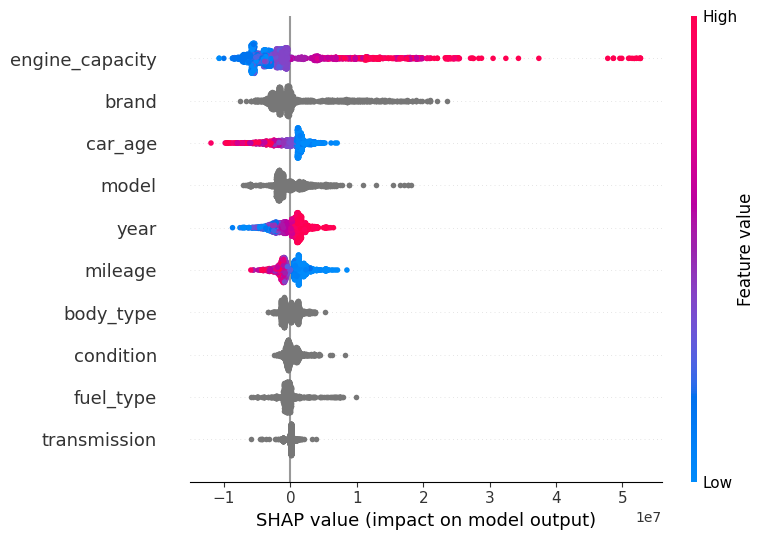

In [7]:
shap.summary_plot(shap_values, X_test)

SHAP Bar Plot

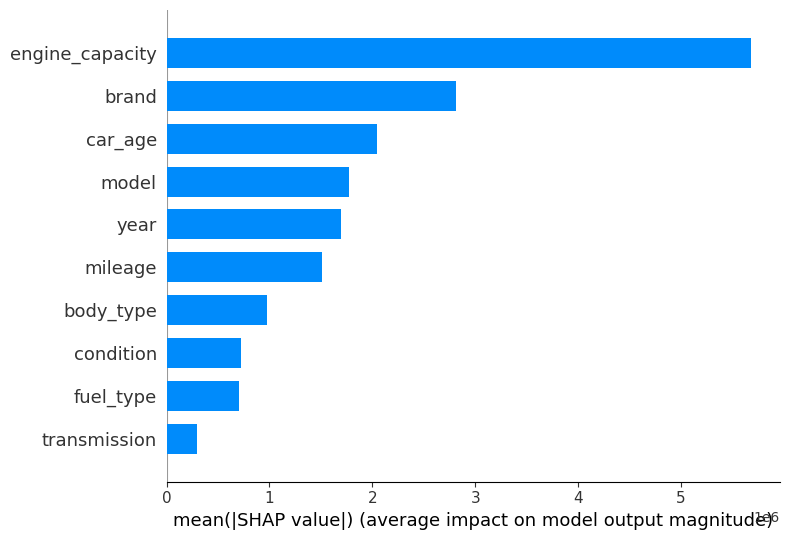

In [8]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

SHAP Dependence Plot - Car Age

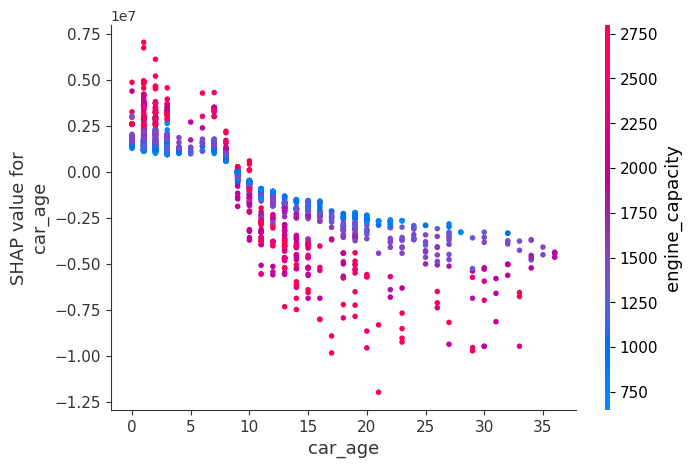

In [9]:
shap.dependence_plot("car_age", shap_values, X_test)

SHAP Dependence Plot - Mileage

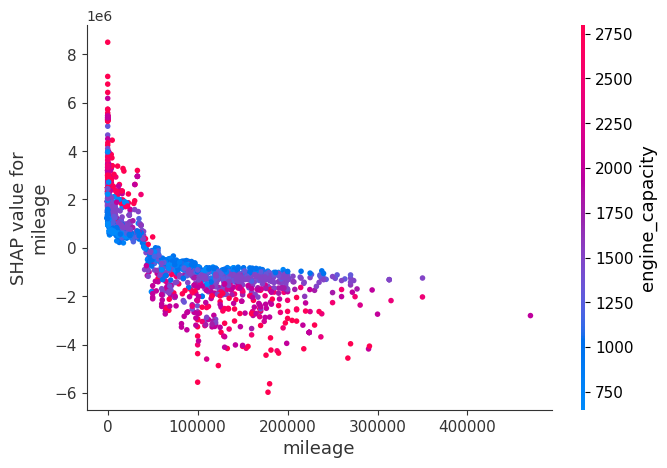

In [10]:
shap.dependence_plot("mileage", shap_values, X_test)

Partial Dependence Plot

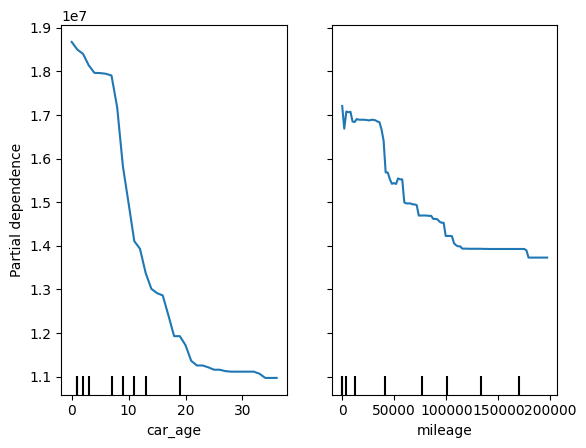

In [11]:
X_test_pdp = X_test.copy()

X_test_pdp["car_age"] = X_test_pdp["car_age"].astype(float)
X_test_pdp["mileage"] = X_test_pdp["mileage"].astype(float)

PartialDependenceDisplay.from_estimator(
    model,
    X_test_pdp,
    ["car_age", "mileage"]
)
plt.show()